In [1]:
import pandas as pd
import numpy as np

In [24]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [25]:
y_train = train['TARGET']
x_train = train.drop(['ID', 'TARGET'], axis = 1)

x_test = test.drop('ID', axis = 1)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

In [28]:
ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(x_train[feature])
    x_train[feature] = le.transform(x_train[feature])

    # x_train데이터에서 존재하지 않았던 값이 x_test 데이터에 존재할 수도 있습니다.
    # 따라서 x_test 데이터를 바로 변형시키지 않고 고윳값을 확인후 x_test 데이터를 변환합니다.
    for label in np.unique(x_test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    x_test[feature] = le.transform(x_test[feature])

In [6]:
!pip install xgboost

     --------------------------------------- 70.9/70.9 MB 15.6 MB/s eta 0:00:00


In [8]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 13.0 MB/s eta 0:00:00


In [10]:
!pip install catboost

     ------------------------------------- 101.0/101.0 MB 12.6 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [11]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [29]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.datasets import make_classification

In [55]:
scorer = make_scorer(f1_score, average='macro')

param_grid = {
    
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15],
    'gamma' : [0,1,2,3],
    'colsample_bytree' : [0.8,0.9]
    

}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(x_train, y_train)


KeyboardInterrupt: 

In [62]:
from tqdm import tqdm
import xgboost as xgb

In [140]:
scorer = make_scorer(f1_score, average='macro')
param_grid = {
    'n_estimators': [300],
    'learning_rate': [0.1],
    'max_depth': [5],
    
    
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5,scoring=scorer)

In [141]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=300, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [5],
                         'n_estimators': [300]},
             scoring=make_scorer(f1_score, average=macro))

In [143]:
pred = grid_search.predict(x_train)
score = f1_score(pred,y_train,average='macro')
score

0.5527211399822115

In [157]:
plt.rc("font", family="Malgun Gothic")

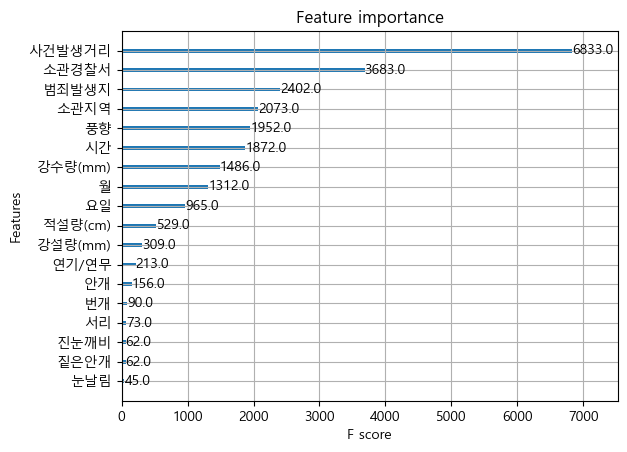

In [159]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(grid_search.fit(x_train, y_train).best_estimator_)
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

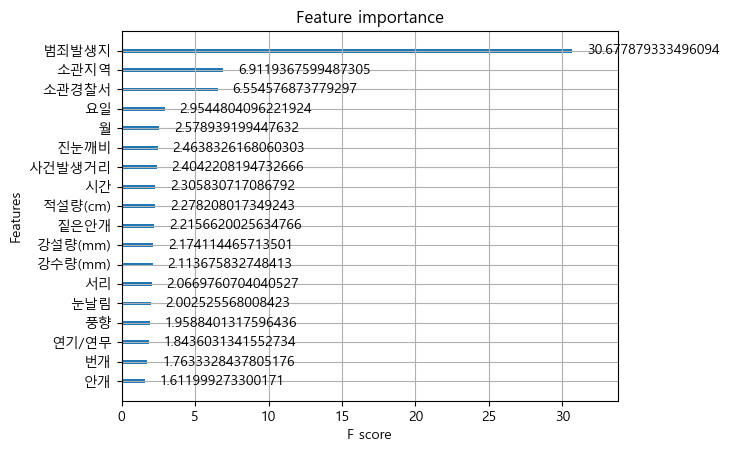

In [162]:
plot_importance(grid_search.fit(x_train, y_train).best_estimator_,importance_type = 'gain')

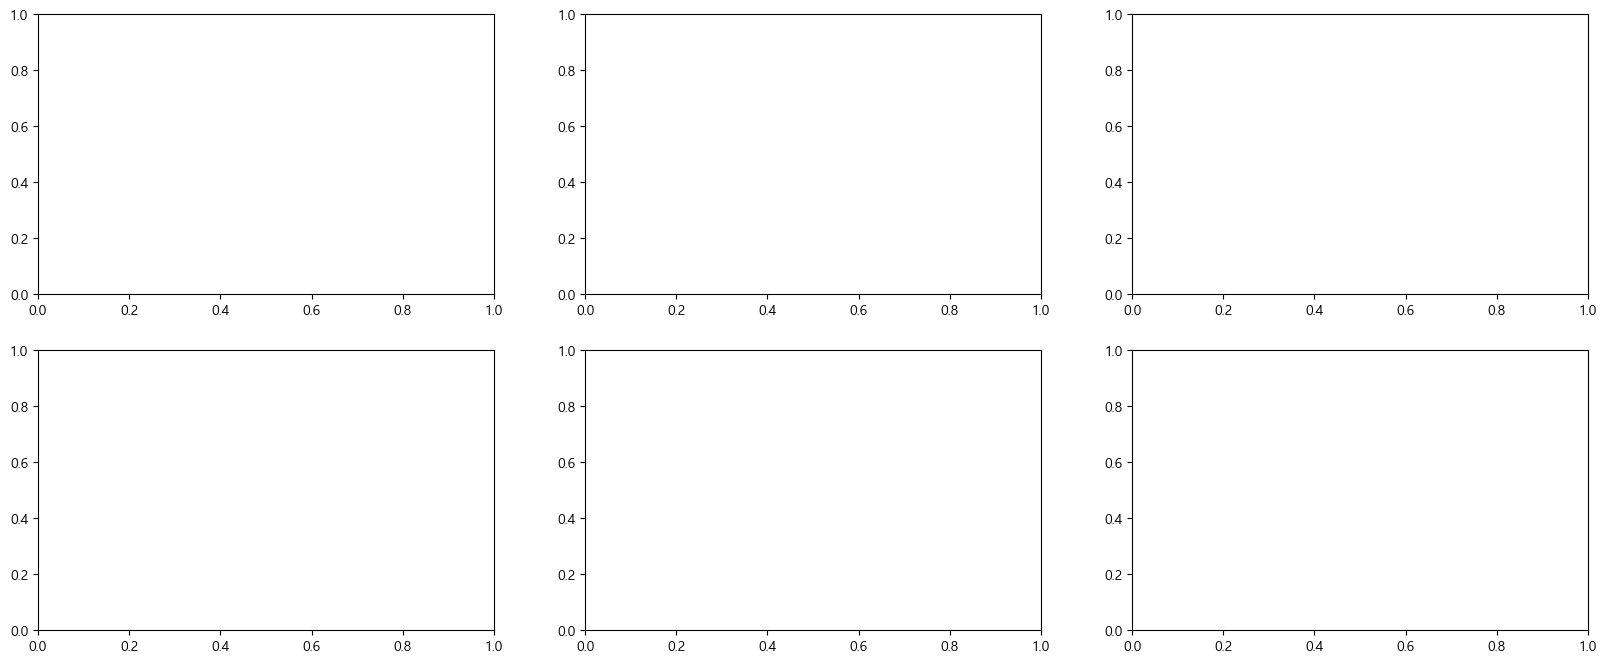

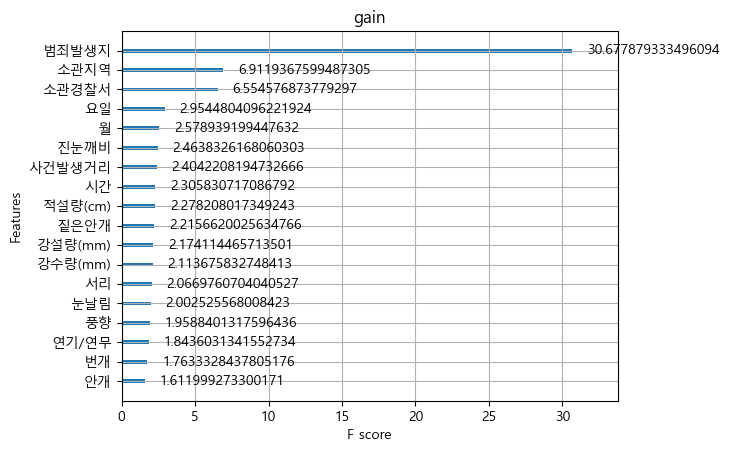

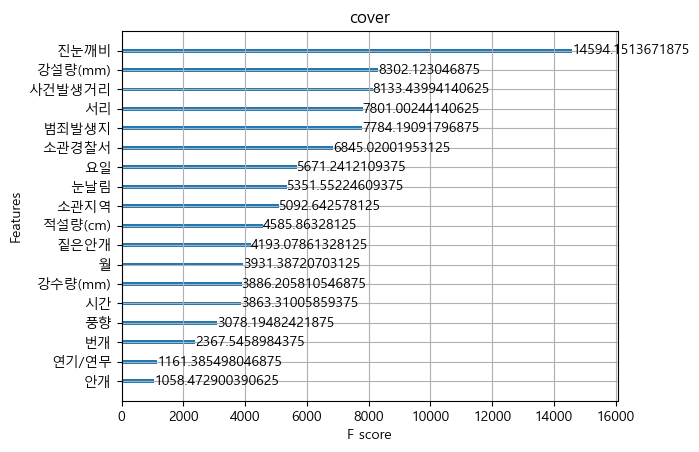

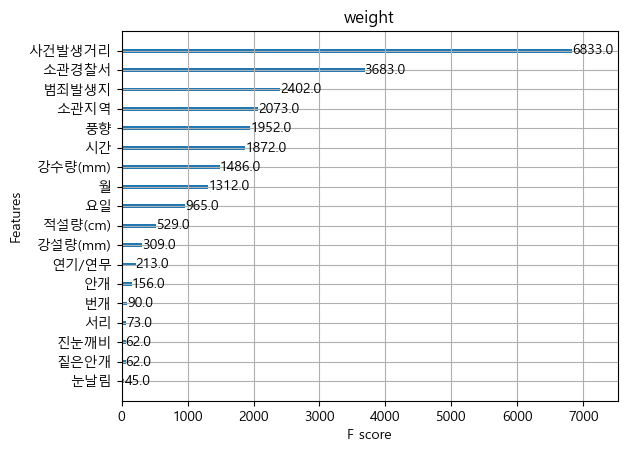

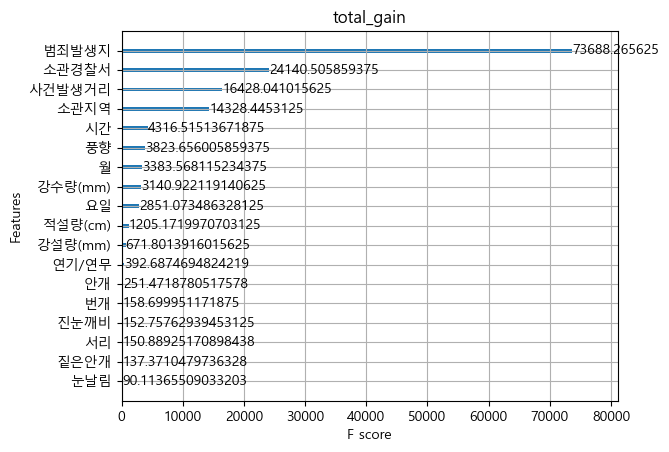

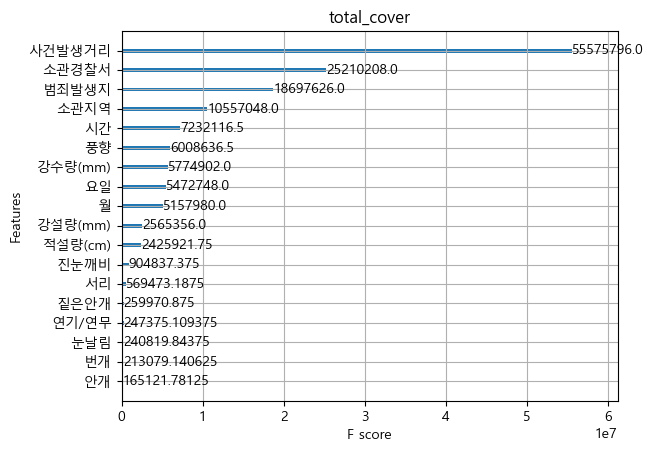

In [170]:
fig, axes = plt.subplots(2,3,figsize =(20,8))
plot_importance(grid_search.fit(x_train, y_train).best_estimator_,importance_type = 'gain',title='gain')
plot_importance(grid_search.fit(x_train, y_train).best_estimator_,importance_type = 'cover',title='cover')
plot_importance(grid_search.fit(x_train, y_train).best_estimator_,importance_type = 'weight',title='weight')
plot_importance(grid_search.fit(x_train, y_train).best_estimator_,importance_type = 'total_gain',title='total_gain')
plot_importance(grid_search.fit(x_train, y_train).best_estimator_,importance_type = 'total_cover',title='total_cover')
plt.show()

In [172]:
pip install shap

     -------------------------------------- 435.6/435.6 kB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [173]:
import shap

In [234]:
explainer = shap.Explainer(xgb_model)

In [236]:
shap_values = explainer.shap_values(x_train)

In [269]:
shap_values

[array([[ 2.5178366e-03, -2.5946172e-02, -6.3574351e-02, ...,
          5.4841870e-03, -2.9091518e-06, -4.5270652e-01],
        [-9.6871024e-03, -3.1435169e-02, -2.6534662e-02, ...,
          2.3734996e-03, -2.9091518e-06, -4.6688291e-01],
        [-2.4748508e-02,  5.4508302e-02, -1.6194601e-02, ...,
         -6.8322234e-03, -8.6500340e-06,  8.6613756e-01],
        ...,
        [-2.1632964e-02,  1.0719583e-01, -1.5294027e-02, ...,
          1.3046850e-03, -1.0914103e-05, -3.4230649e-01],
        [ 2.9794755e-03, -3.2780990e-02, -1.6098782e-02, ...,
         -6.1044493e-03, -4.0607920e-05,  2.8532529e-01],
        [ 9.5701469e-03, -1.5494142e-02,  2.9484196e-02, ...,
          1.0404739e-03,  1.6039190e-05,  2.7466190e-01]], dtype=float32),
 array([[-1.15010776e-02,  6.70106038e-02, -4.93264105e-03, ...,
         -2.05729739e-04,  2.72122968e-04, -2.54607424e-02],
        [ 3.15068997e-02,  7.13721216e-02,  7.91033059e-02, ...,
          1.80993273e-04,  8.84617184e-05,  9.98571739e-02]

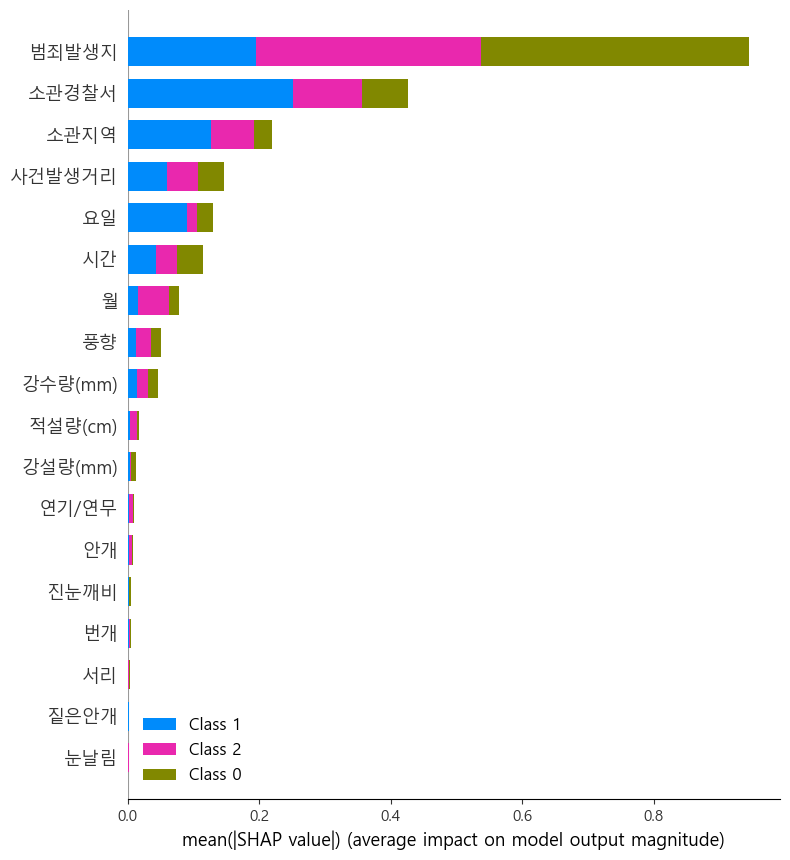

In [194]:
shap.summary_plot(shap_values, x_train, plot_type='bar')
plt.show()

In [271]:
explainer.expected_value

[0.7831708, 0.39242908, 0.293099]

In [258]:
pd.DataFrame(shap_values[0],columns=x_train.columns).head()

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,0.002518,-0.025946,-0.063574,0.085018,-0.011413,-0.038953,-0.003454,-0.003745,-0.001729,-0.004906,0.001228,0.000062,0.000004,0.001485,-0.000267,0.005484,-0.000003,-0.452707
1,-0.009687,-0.031435,-0.026535,0.067677,-0.062878,0.009738,-0.005451,-0.008499,-0.001042,0.003811,0.003589,0.000064,-0.000226,0.002132,0.000098,0.002373,-0.000003,-0.466883
2,-0.024749,0.054508,-0.016195,-0.109488,-0.132996,-0.016123,-0.005817,-0.003266,-0.002211,-0.013239,-0.003887,0.000006,-0.000235,0.001320,-0.000088,-0.006832,-0.000009,0.866138
3,-0.011250,0.019850,0.005181,-0.074431,-0.059732,-0.088649,-0.009977,-0.007255,-0.006102,0.004977,-0.000812,-0.025556,-0.000311,0.001571,0.000174,-0.000863,-0.000009,0.278163
4,0.007896,0.055553,0.008308,0.057050,0.019757,-0.096652,-0.003046,-0.003524,-0.004860,-0.026412,-0.000395,-0.000033,-0.001373,0.001418,-0.000017,0.001574,-0.000004,0.031804


In [268]:
pd.DataFrame(shap_values[1],columns=x_train.columns).head()

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,-0.011501,0.067011,-0.004933,0.111092,-0.016003,0.171450,-0.002075,0.000808,0.000347,-0.007990,0.000326,-0.000472,-0.003841,-0.000160,0.000263,-0.000206,0.000272,-0.025461
1,0.031507,0.071372,0.079103,-0.297098,-0.168529,0.031075,-0.000529,-0.000053,0.001933,-0.009002,-0.000912,0.000207,-0.000032,-0.001007,0.000214,0.000181,0.000088,0.099857
2,0.030965,-0.228395,0.056058,0.471674,0.481827,-0.019353,0.019936,-0.000748,0.004247,0.010604,0.000863,-0.001219,0.000243,0.000668,0.000342,-0.001280,0.000110,-0.413659
3,-0.009900,0.012956,0.046679,-0.039257,0.333952,-0.031329,-0.018815,0.000009,0.004422,-0.000660,0.000094,0.041515,0.003173,0.000592,0.000242,0.000358,0.000164,-0.187933
4,-0.013836,-0.165636,-0.117744,-0.220511,-0.089789,-0.046358,-0.002246,-0.001846,0.000316,0.019268,0.000066,-0.000379,0.000053,0.000428,0.000272,0.001615,0.000190,0.018299


In [264]:
#0,1,2 target have 3 type
pd.DataFrame(shap_values[2],columns=x_train.columns).head()

Shap Values for 'Prince Range 3' class


,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,-0.016911,0.013411,0.051374,-0.073821,-0.089269,-0.006522,0.006796,0.001324,0.002635,-0.002513,-0.001647,0.000026,0.002631,-0.000106,-0.000525,-0.001530,-0.000138,0.460609
1,-0.076399,0.008789,-0.043606,0.275999,0.044124,0.013728,0.006894,0.000442,0.002099,0.003026,-0.000533,-0.000007,0.001041,-0.000106,-0.000474,-0.001904,0.000004,0.436391
2,-0.041606,0.004336,-0.027869,-0.166160,-0.233626,-0.002645,0.007950,0.000332,0.003812,0.020034,0.004160,-0.000010,0.000734,-0.000039,-0.000786,0.030552,0.000680,-0.277769
3,0.014399,-0.002006,-0.026836,0.019826,-0.232213,0.008871,-0.000570,0.000571,0.006469,0.005385,0.001747,-0.000280,0.000560,-0.000256,-0.001121,-0.001657,0.000723,-0.161795
4,-0.054409,0.007862,0.046250,-0.039852,0.018795,0.060757,0.007341,0.001055,0.008455,0.013273,-0.000161,-0.000005,0.000806,-0.000049,-0.000329,-0.001687,0.000780,-0.006047


In [259]:
#강도
shap.initjs()
shap.force_plot(explainer.expected_value[0],
shap_values[0][0,:], x_train.iloc[0])
#class 0에 속할 확률이 0.27

In [267]:
#절도
shap.initjs()
shap.force_plot(explainer.expected_value[1],
shap_values[1][0,:], x_train.iloc[0])

In [266]:
#상해
shap.initjs()
shap.force_plot(explainer.expected_value[2],
shap_values[2][0,:], x_train.iloc[0,:])

In [182]:
xgb_model = XGBClassifier(n_estimators= 300,learning_rate= 0.1,max_depth= 5)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [187]:
a = xgb_model.fit(x_train, y_trai

In [ ]:
param_grid

In [ ]:
xgboost + gridsearch 시간측정

In [ ]:
# xgb_model = XGBClassifier()

scorer = make_scorer(f1_score, average='macro')
param_grid = {
    'n_estimators': [100, 200,300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring=scorer)

total_iterations = len(param_grid['n_estimators']) * len(param_grid['learning_rate']) * len(param_grid['max_depth'])

with tqdm(total=total_iterations) as pbar:
    for n_estimators in param_grid['n_estimators']:
        for learning_rate in param_grid['learning_rate']:
            for max_depth in param_grid['max_depth']:
                xgb_model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
                xgb_model.fit(x_train, y_train)
                pbar.update()





In [79]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(f1_score, average=macro))

In [124]:
#best f1_macro 수치와 best parameter확인
print("best f1_macro : {0: .4f}".format(grid_search.best_score_))
print("best param : ",grid_search.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [98]:
pred = xgb_model.predict(x_train)

In [100]:
score = f1_score(pred,y_train,average='macro')
score

0.5199249662055722

In [102]:
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.1],
    'max_depth': [5]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring=scorer)


In [103]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=300, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [5],
                         'n_estimators': [200]},
             scoring=make_scorer(f1_score, average=macro))

In [104]:
pred = grid_search.predict(x_train)

In [105]:
score = f1_score(pred,y_train,average='macro')
score

0.5417597389719461

In [106]:
pred2 = grid_search.predict(x_test)

In [108]:
sub['TARGET'] = pred2
sub.head()

,ID,TARGET
0,TEST_00000,2
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [109]:
sub.to_csv('sub_xgb_grid.csv', index = False)

In [ ]:
cat boost

In [110]:
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'depth': [3, 4, 5]
}

In [111]:
catboost_model = CatBoostClassifier(loss_function='MultiClass')

In [112]:
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(x_train, y_train)

0:	learn: 1.0817007	total: 182ms	remaining: 18.1s
1:	learn: 1.0687542	total: 193ms	remaining: 9.47s
2:	learn: 1.0576999	total: 204ms	remaining: 6.61s
3:	learn: 1.0486246	total: 216ms	remaining: 5.17s
4:	learn: 1.0408091	total: 228ms	remaining: 4.33s
5:	learn: 1.0344688	total: 239ms	remaining: 3.74s
6:	learn: 1.0288335	total: 250ms	remaining: 3.32s
7:	learn: 1.0237811	total: 261ms	remaining: 3s
8:	learn: 1.0196841	total: 272ms	remaining: 2.75s
9:	learn: 1.0164834	total: 283ms	remaining: 2.55s
10:	learn: 1.0136111	total: 295ms	remaining: 2.38s
11:	learn: 1.0109872	total: 306ms	remaining: 2.25s
12:	learn: 1.0084947	total: 317ms	remaining: 2.12s
13:	learn: 1.0066106	total: 329ms	remaining: 2.02s
14:	learn: 1.0044488	total: 339ms	remaining: 1.92s
15:	learn: 1.0027120	total: 349ms	remaining: 1.83s
16:	learn: 1.0013347	total: 360ms	remaining: 1.76s
17:	learn: 1.0002296	total: 370ms	remaining: 1.69s
18:	learn: 0.9987526	total: 382ms	remaining: 1.63s
19:	learn: 0.9977589	total: 395ms	remaining:

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000022A87423550>,
             param_grid={'depth': [3, 4, 5], 'iterations': [100, 200, 300],
                         'learning_rate': [0.1, 0.05, 0.01]},
             scoring=make_scorer(f1_score, average=macro))

In [113]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (macro F1):", best_score)

Best Parameters: {'depth': 4, 'iterations': 300, 'learning_rate': 0.1}
Best Score (macro F1): 0.5204461674668306


In [115]:
pred = grid_search.predict(x_train)

In [116]:
score = f1_score(pred,y_train,average='macro')
score

0.5238333916951298

In [117]:
param_grid = {
    'iterations': [300],
    'learning_rate': [0.1],
    'depth': [4]
}

In [118]:
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(x_train, y_train)

0:	learn: 1.0797323	total: 13.1ms	remaining: 3.91s
1:	learn: 1.0646777	total: 25.5ms	remaining: 3.81s
2:	learn: 1.0526725	total: 37.5ms	remaining: 3.71s
3:	learn: 1.0426649	total: 50.2ms	remaining: 3.71s
4:	learn: 1.0347139	total: 62.7ms	remaining: 3.7s
5:	learn: 1.0279269	total: 74.8ms	remaining: 3.67s
6:	learn: 1.0221912	total: 87.2ms	remaining: 3.65s
7:	learn: 1.0177674	total: 99.4ms	remaining: 3.63s
8:	learn: 1.0134586	total: 111ms	remaining: 3.6s
9:	learn: 1.0098299	total: 123ms	remaining: 3.57s
10:	learn: 1.0066438	total: 136ms	remaining: 3.56s
11:	learn: 1.0041377	total: 147ms	remaining: 3.54s
12:	learn: 1.0019868	total: 161ms	remaining: 3.56s
13:	learn: 0.9997413	total: 175ms	remaining: 3.57s
14:	learn: 0.9978674	total: 188ms	remaining: 3.56s
15:	learn: 0.9965279	total: 202ms	remaining: 3.59s
16:	learn: 0.9950127	total: 214ms	remaining: 3.55s
17:	learn: 0.9935559	total: 228ms	remaining: 3.57s
18:	learn: 0.9921940	total: 242ms	remaining: 3.58s
19:	learn: 0.9910801	total: 255ms	r

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000022A87423550>,
             param_grid={'depth': [4], 'iterations': [300],
                         'learning_rate': [0.1]},
             scoring=make_scorer(f1_score, average=macro))

In [119]:
pred = grid_search.predict(x_test)

In [120]:
sub['TARGET'] = pred2
sub.head()

,ID,TARGET
0,TEST_00000,2
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [121]:
sub.to_csv('sub_cat_grid.csv', index = False)

In [ ]:
grid_search.b